<a href="https://colab.research.google.com/github/MaxCojocari/CV_camp_projects/blob/main/cv_cats_vs_dogs_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download --unzip -d tongpython/cat-and-dog

 93% 203M/218M [00:01<00:00, 118MB/s]
100% 218M/218M [00:01<00:00, 122MB/s]


In [ ]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

#Choosing devide to be gpu if have one, else cpu
cuda_available = torch.cuda.is_available()

# If cuda is available we are going to use it
# otherwise we are going to train the model on the cpu
DEVICE = (
    torch.device('cuda')
    if cuda_available
    else torch.device('cpu')
)

print(
    'We are going to train the model using ', device,
    (', bitch!!!' if cuda_available else '.'), sep=''
) 

We are going to train the model using cuda, bitch!!!


In [ ]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
train_data = ImageFolder(r'/content/drive/MyDrive/Data_ML/training_set/training_set', transform = transformations)
test_data = ImageFolder(r'/content/drive/MyDrive/Data_ML/test_set/test_set', transform = transformations)

In [ ]:
class Net(nn.Module):

  def __init__(self):
        super().__init__()

        #(224, 224)

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)

        self.pool1 = nn.MaxPool2d(2)

        #(112, 112)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.pool2 = nn.MaxPool2d(2)

        #(56, 56)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.pool3 = nn.MaxPool2d(2)

        #(28, 28)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128*28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

  def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))

        out = self.flatten(out)

        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))

    return out


In [ ]:
# Training loop for our network
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    #Initializing two lists to save accuracy to plot them later
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    #Going thru every epoch
    for epoch in range(n_epochs):

        #Going thru example, thru every batch, in our case, thru all data at once
        for example, labels in train_loader:     

            #Translating calculations to gpu if is available
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)

            # ensuring equal number of dimensions for labels and examples
            labels  = labels.unsqueeze(1)

            # running our data thru our data - forward
            output = model(example.float())
            # Getting loss of our network right now
            loss = loss_fn(output, labels.float())

            # Zeroing the gradient to not stack it from other iterations
            optimizer.zero_grad()
            #Runing backward part of the neural network, getting gradiets
            loss.backward()
            #Updating our paramters
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total
                
        print(f'Epoch {epoch+1})', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}')

    #If set to True, print graph of train and validation loss
    if print_plot:

        #Setting x-ticks
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [ ]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle=True)

Epoch 1) Train Accuracy: 0.6860711574554443 Test Accuracy: 0.6712802648544312
Epoch 2) Train Accuracy: 0.7833853363990784 Test Accuracy: 0.7394957542419434
Epoch 3) Train Accuracy: 0.8577138781547546 Test Accuracy: 0.7607513070106506
Epoch 4) Train Accuracy: 0.8933166265487671 Test Accuracy: 0.7627285718917847
Epoch 5) Train Accuracy: 0.961149275302887 Test Accuracy: 0.7736034989356995
Epoch 6) Train Accuracy: 0.9885071516036987 Test Accuracy: 0.7740978598594666
Epoch 7) Train Accuracy: 0.9888819456100464 Test Accuracy: 0.7681660652160645
Epoch 8) Train Accuracy: 0.9948781728744507 Test Accuracy: 0.7607513070106506
Epoch 9) Train Accuracy: 0.9850093126296997 Test Accuracy: 0.7627285718917847
Epoch 10) Train Accuracy: 0.9940037131309509 Test Accuracy: 0.7686603665351868


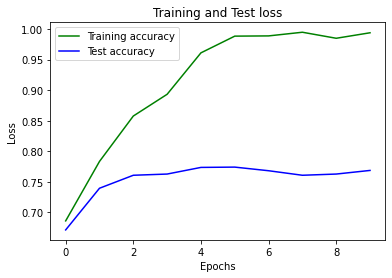

In [ ]:
learning_rate = 1e-3 # 0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Epoch 1) Train Accuracy: 0.930168628692627 Test Accuracy: 0.9214038252830505
Epoch 2) Train Accuracy: 0.9455339908599854 Test Accuracy: 0.9248639941215515
Epoch 3) Train Accuracy: 0.9579012989997864 Test Accuracy: 0.9347503185272217
Epoch 4) Train Accuracy: 0.9672704339027405 Test Accuracy: 0.9451309442520142
Epoch 5) Train Accuracy: 0.9607744812965393 Test Accuracy: 0.9382105469703674
Epoch 6) Train Accuracy: 0.9740161895751953 Test Accuracy: 0.9357389807701111
Epoch 7) Train Accuracy: 0.9762648344039917 Test Accuracy: 0.9416707158088684
Epoch 8) Train Accuracy: 0.9765146374702454 Test Accuracy: 0.9396934509277344
Epoch 9) Train Accuracy: 0.9800124764442444 Test Accuracy: 0.9357389807701111
Epoch 10) Train Accuracy: 0.9777638912200928 Test Accuracy: 0.9446366429328918


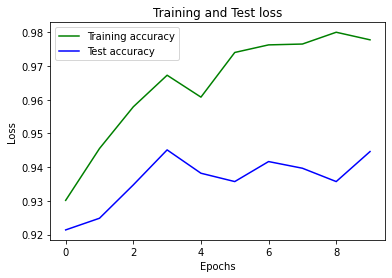

In [ ]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

#loss_fn = nn.BCEWithLogitsLoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)